```
NOTES:
Scaling decision variables to same order of magnitude has the counter-intuitive effect of slowing down convergence, precisely what we had observed in the previous implementation for this problem (example 6).

Perhaps this a problem-specific phenomenon.
```

# 2D planning with two obstacle avoidance

## Problem definition

In [22]:
include("ex8_data.jl");

## Load PIPG tools

In [23]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "execute_utils.jl" true
@load_file "ex8_plotting.jl" false;

## Solve via JuMP

In [24]:
exe_utils.execute_JuMP!(:mosek)

Termination status: OPTIMAL

## Solve via PIPG

In [25]:
exe_utils.execute_PIPG!()

Total PIPG iterations          : 203
Norm of optimum                : 1.912
Distance to optimum (absolute) : 0.005017707815303085
Distance to optimum (relative) : 0.002624324171183622 
Dynamics error                 : 0.0007154775509835287

## Benchmark PIPG

In [26]:
# using BenchmarkTools
exe_utils.execute_pipg_benchmark()

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     872.974 μs (0.00% GC)
  median time:      1.158 ms (0.00% GC)
  mean time:        1.174 ms (0.00% GC)
  maximum time:     1.885 ms (0.00% GC)
  --------------
  samples:          4220
  evals/sample:     1

In [27]:
# using TimerOutputs
exe_utils.execute_pipg_timeit()

 ──────────────────────────────────────────────────────────────────
                           Time                   Allocations      
                   ──────────────────────   ───────────────────────
 Tot / % measured:     42.0ms / 74.0%            248KiB / 0.00%    

 Section   ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────
 PIPG          20   31.0ms   100%  1.55ms     0.00B   - %     0.00B
 ──────────────────────────────────────────────────────────────────

## Diagnostic data

Power iteration estimate of σ  : 5.202500535377719
SVD estimate of σ              : 5.307334565638977

Total PIPG iterations          : 10000
Norm of optimum                : 1.912
Distance to optimum (absolute) : 1.3671582794584983e-6
Distance to optimum (relative) : 7.150409411393819e-7 
Dynamics error                 : 6.297378963779354e-9

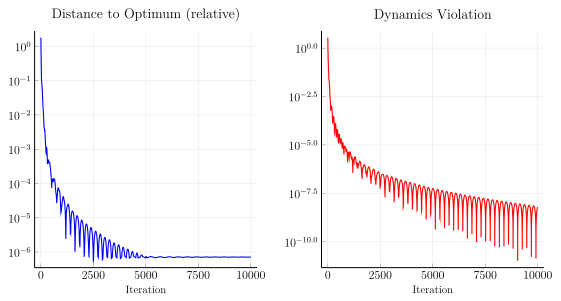

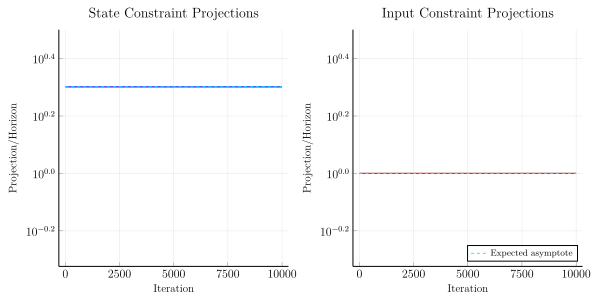

In [28]:
exe_utils.execute_PIPG!(true)

## Visualization

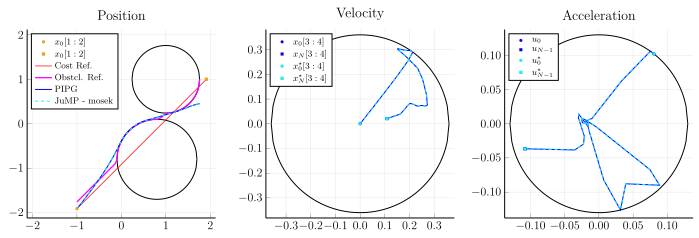

In [29]:
plotter.trajectory2D(iX.x,iX.u,2)